<div style="border:solid green 2px; padding: 20px">
<b>Станислав, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Критическая ошибка: ❌</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Хорошо, но можно и лучше: ❗️</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Все отлично: ✅</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')

Открыл файл и посмотрел на общую структуру данных для анализа.


In [ ]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод общей информации о таблице:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbded848b50>,
      dtype=object)

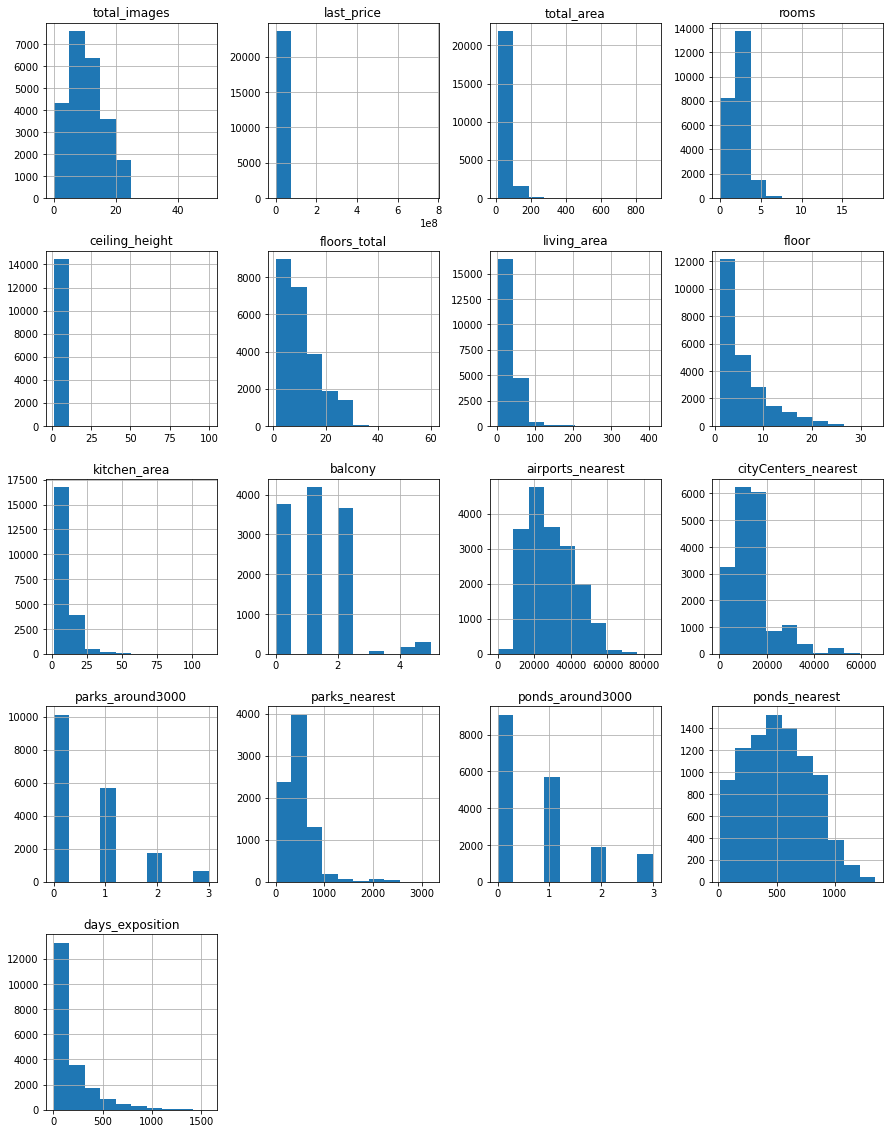

In [ ]:
data.hist(figsize=(15, 20))

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Классный способ визуализировать распределения сразу для всех столбцов 👍

</div>

### Предобработка данных

# Дубликаты и пропуски

Проверка на явные дубликаты

In [ ]:
duplicates = data[data.duplicated()]
duplicates

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Дубликатов нет, смотрим на количество пропущенных значений:

In [ ]:
#data.isna().sum()
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')
#смотрим в каких столбцах пропущенные значения


<ipython-input-6-33d0e303c7dd>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')


,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ посчитать доли пропущенных значений и визуализировать их с помощью тепловой карты 👍

</div>

Приводим к типу `datetime64` столбец `'first_day_exposition'`.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Удалим пустые строки для столбца `'locality_name'`, т.к. будет невозможно определить зависимость на стоимость.

In [ ]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

Заменим пропущенные значения в `'floors_total'`. Вероятно для одноэтажных зданий значение вовсе не указали.

In [ ]:
data['floors_total'] = data['floors_total'].fillna(1)

<ipython-input-9-8c3bc91a232d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].fillna(1)


 В столбце `'is_apartment'` вероятнее всего пропуск означает булево значение False, заменим.

In [ ]:

data['is_apartment'] = data['is_apartment'].fillna(False) 

Пропуски в `'balcony'` заменим на 0, т.к. пропуск скорее всего указывает на его отсутствие.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

`'days_exposition'` заменим медианой

In [ ]:
data.loc[data['days_exposition'].isnull(), 'days_exposition'] = data['days_exposition'].median()

Пропуски в `'kitchen_area'` и `'living_area'` заменю через расчет коэффициента(среднеее отношение данных типов площадей к общему).

In [ ]:
kitchen_index = data['kitchen_area'].mean() / data['total_area'].mean()
living_index = data['living_area'].mean() / data['total_area'].mean()

data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_index * data['total_area'])
data['living_area'] = data['living_area'].fillna(living_index * data['total_area'])
print(f'Количество пропущенных значений в столбце площадь кухни: {data["kitchen_area"].isna().sum()}')
print(f'Количество пропущенных значений в столбце жилая площадь: {data["living_area"].isna().sum()}')

Количество пропущенных значений в столбце площадь кухни: 0
Количество пропущенных значений в столбце жилая площадь: 0


<div class="alert alert-info"> <b>
Исправил

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

# Типы данных

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23650 non-null  float64       
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Данные в столбцах `'floors_total'`,`'balcony'` и `'days_exposition'` не могут быть дробными, приводим тип к данных к integer.

In [ ]:
for column in ['balcony', 'floors_total', 'days_exposition','floor','rooms']:
    data[column] = data[column].astype('int')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Супер 👍, отличный способ заменить типы данных в нашем проекте 🔥
    
</div>

# Уникальные значения

In [ ]:
#Смотрим количество уникальных значений
print(f'Количество уникальных значений в столбце "locality_name": {data["locality_name"].nunique()}')


Количество уникальных значений в столбце "locality_name": 364


<div class="alert alert-info"> <b>
Исправил

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Лучше всего подписывать текстом получившиеся расчеты, так каждый сразу сможет понять что хотел показать автор.
    
</div>

Приводим все к нижнему регистру и заменим "е" на "ё".

In [ ]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].nunique()

330

In [ ]:
data['locality_name'].sort_values().unique()

array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'городской поселок большая ижора',
       'городской поселок будогощь', 'городской поселок виллози',
       'городской поселок лесогорский', 'городской поселок мга',
       'городской поселок назия', 'городской поселок новоселье',
       'городской поселок павлово', 'городской поселок рощино',
       'городской поселок свирьстрой', 'городской поселок советский',
       'городской поселок федоровское', 'городской поселок янино-1',
       'деревня агалатово', 'деревня аро', 'деревня батово',
       'деревня бегуницы', 'деревня белогорка', 'деревня большая вруда',
       'деревня большая пустомержа', 'деревня большие колпаны',
       'деревня большое рейзино', 'деревня большой сабск', 'деревня бор',
       'деревня борисова грива', 'деревня ваганово', 'деревня вартемяги',
       'деревня вахнова кара', 'деревня выскатка', 'деревня гарболово',
       'деревня глинка', 'деревня горбунки', 'дерев

Заменим "поселок городского типа" и "городской поселок" на "поселок". А для значений "Мурино" уберем тип населенного пункта.

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', \
                                                          'поселок').replace('городской поселок', 'поселок') \
.replace('поселок мурино', 'мурино')
print(f'Количество уникальных значений в столбце "locality_name" после предобработки: {data["locality_name"].nunique()}')
#data['locality_name'].sort_values().unique()

Количество уникальных значений в столбце "locality_name" после предобработки: 328


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, если код не помещается в одну строку, рекомендую переносить его на следующую подстроку с помощью обратного слеша. Так код читается проще и быстрее. 
    
</div>

In [ ]:
data['locality_name'].value_counts()

санкт-петербург               15721
мурино                          590
поселок шушары                  440
всеволожск                      398
пушкин                          369
                              ...  
поселок форт красная горка        1
деревня сижно                     1
деревня котлы                     1
деревня пикколово                 1
поселок дзержинского              1
Name: locality_name, Length: 328, dtype: int64

Проверим еще раз дубликаты:

In [ ]:
data.duplicated().sum()

0

 В столбце `'ceiling_height'` `Nan` заменим на медиану. Так же видно ошибочные данные, исправляем.

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].replace(25,2.5).replace(32, 3.2).replace(27, 2.7)\
.replace(24, 2.4).replace(26, 2.6).replace(27.5, 2.7).replace(27.5, 2.7).replace(22.6,2.6)\
.replace(100,2.65).replace(100,2.65).replace(14,2.65).replace(20,2.65) \
.replace(10.3, 2.65).replace(1.2, 2.65).replace(1.75, 2.65).replace(1, 2.65)
data.isna().sum()
# указанная высота скорее всего ошибочно занесена в таблицу, исправляем на реалистичные, 
# а данные меньше 2 и больше 10 также заменим на медиану.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition             0
dtype: int64

Проверяем на аномальные значения в других столбцах:
`total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	...	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition`

In [ ]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [ ]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [ ]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Значение комнат не может быть равно 0, заменим медианой.

In [ ]:
data.loc[data['rooms'] == 0, 'rooms'] = data['rooms'].median()

In [ ]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [ ]:
data['square_meter_price'] = data['last_price'] / data['total_area']

День недели публикации объявления, где 0 - понедельник, 1 - вторник и т.д.

In [ ]:
data['publication_day'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek

Месяц публикации объявления

In [ ]:
data['publication_month'] = pd.DatetimeIndex(data['first_day_exposition']).month

Год публикации объявления

In [ ]:
data['publication_year'] = pd.DatetimeIndex(data['first_day_exposition']).year

Этаж квартиры:

In [ ]:
def categ_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['categ_floor'] = data.apply(categ_of_floor, axis=1)

Расстояние до центра города в километрах:

In [ ]:
data['distance_to_center'] = data['cityCenters_nearest'] / 1000
data['distance_to_center'] = data['distance_to_center'].round(0)

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Мы достаточно детально обработали наши данные и добавили все необходимые значения в нашу выборку. Давай теперь проведём анализ.
    
</div>

### Проведите исследовательский анализ данных

####  Изучение параметров объектов:


Общая площадь:

In [ ]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

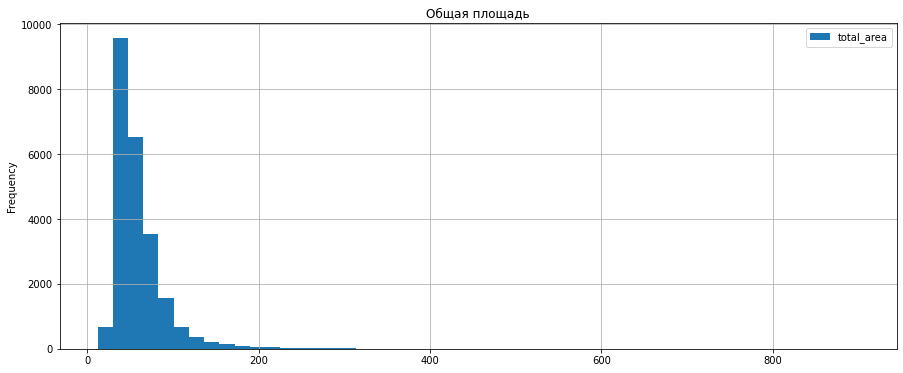

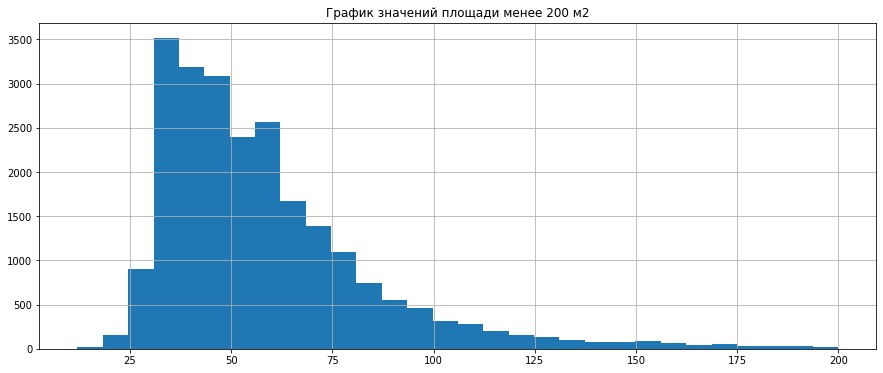

Согласно данным средняя площадь составляет 60.3 м2, а медиана 52.0 м2. Больше всего значений до 70 кв.м.


In [ ]:
data.plot(kind='hist', title='Общая площадь', y='total_area', bins=50, grid=True, figsize=(15,6))
plt.show()
plt.title('График значений площади менее 200 м2')
data.query('total_area <= 200')['total_area'].hist(bins=30,figsize=(15,6))
plt.show()
print(f"Согласно данным средняя площадь составляет {data['total_area'].mean().round(1)} м2, \
а медиана {data['total_area'].median()} м2. Больше всего значений до 70 кв.м.")

<div class="alert alert-info"> <b>
Исправил

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Не забывай пожалуйста подписавать каждый график. Это важный момент всего проект, потому что так быстрее понять о чем идёт речь на графике.

</div>

Жилая площадь:

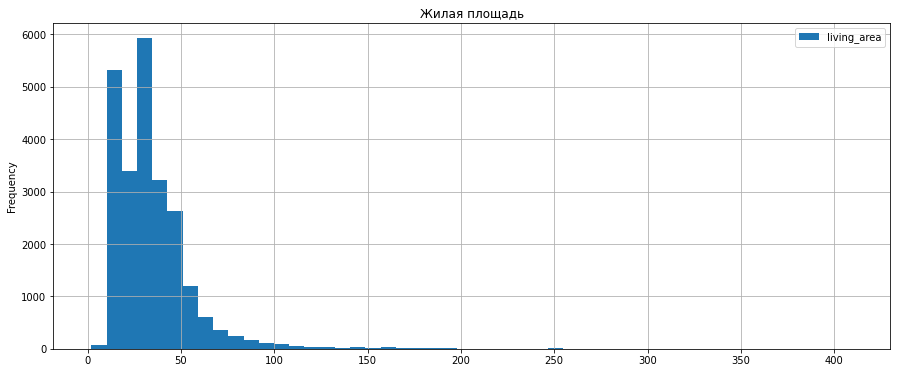

Согласно данным средняя площадь составляет 34.6 м2, а медиана 30.0 м2. Большинство предложений до 50 кв.м.


In [ ]:
data.plot(kind='hist', title='Жилая площадь', y='living_area', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным средняя площадь составляет {data['living_area'].mean().round(1)} м2, \
а медиана {data['living_area'].median()} м2. Большинство предложений до 50 кв.м.")

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда график подписан 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

Площадь кухни:

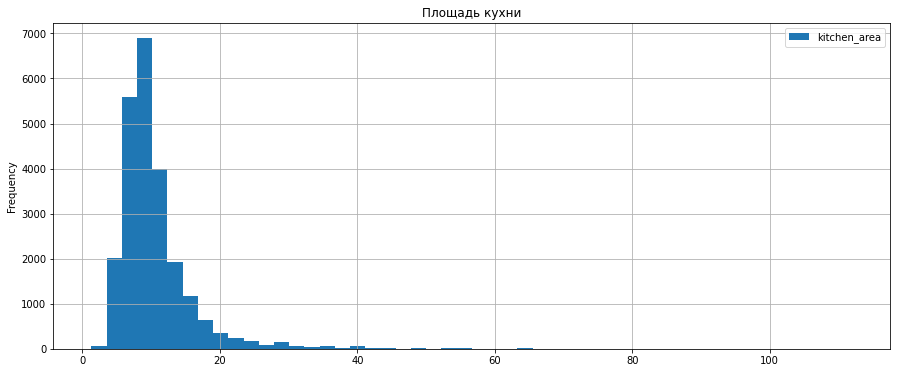

Согласно данным средняя площадь составляет 10.5 м2, а медиана 9.0 м2.


In [ ]:
data.plot(kind='hist', title='Площадь кухни', y='kitchen_area', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным средняя площадь составляет \
{data['kitchen_area'].mean().round(1)} м2, а медиана {data['kitchen_area'].median().round(1)} м2.")

Количества комнат:

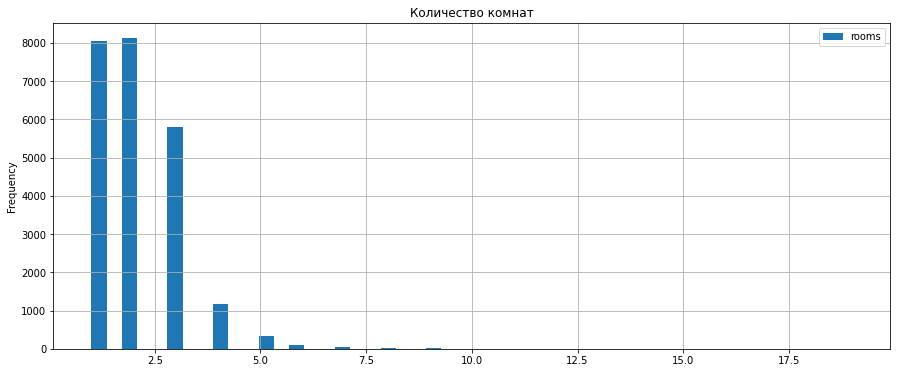

Согласно данным среднее количество комнат 2.0 м2, а медиана 2.0 м2.


In [ ]:
data.plot(kind='hist', title='Количество комнат', y='rooms', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее количество комнат \
{data['rooms'].mean().round(0)} м2, а медиана {data['rooms'].median().round(1)} м2.")

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

Высота потолков:

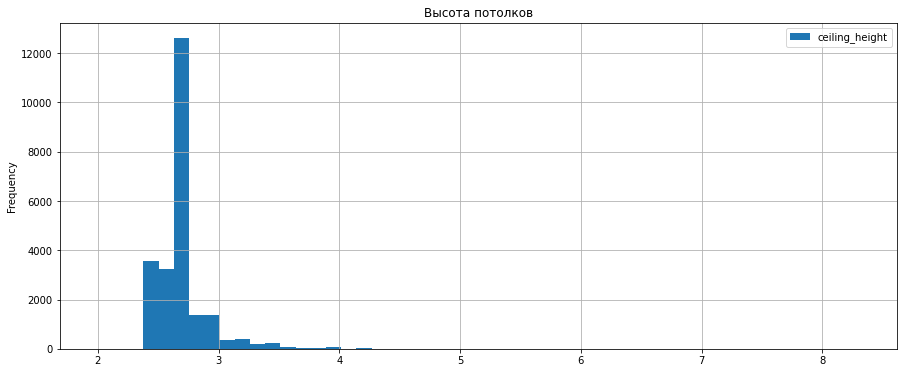

Согласно данным среднее значение 2.7 м2, а медиана 2.6 м2.


In [ ]:
data.plot(kind='hist', title='Высота потолков', y='ceiling_height', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение \
{data['ceiling_height'].mean().round(1)} м2, а медиана {data['ceiling_height'].median().round(1)} м2.")

Этаж квартиры:

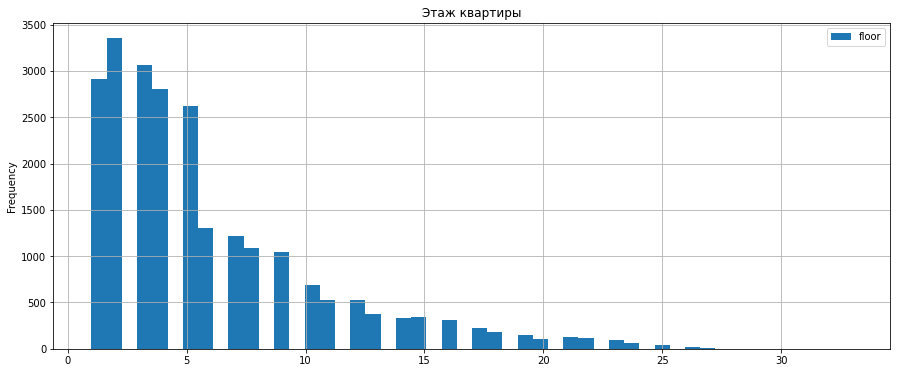

Согласно данным среднее значение 6.0, а медиана 4.0.


In [ ]:
data.plot(kind='hist', title='Этаж квартиры', y='floor', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение \
{data['floor'].mean().round(0)}, а медиана {data['floor'].median().round(0)}.")

Тип этажа квартиры («первый», «последний», «другой»):

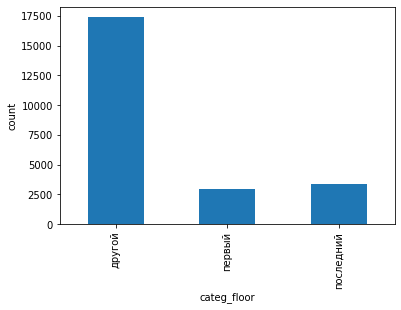

Из графика видно что преобладают средние этажи, крайние менее популярны.


In [ ]:
data.groupby(by='categ_floor')['categ_floor'].count().plot(kind='bar', ylabel = 'count')
plt.show()
print(f"Из графика видно что преобладают средние этажи, крайние менее популярны.")

Общее количество этажей в доме:

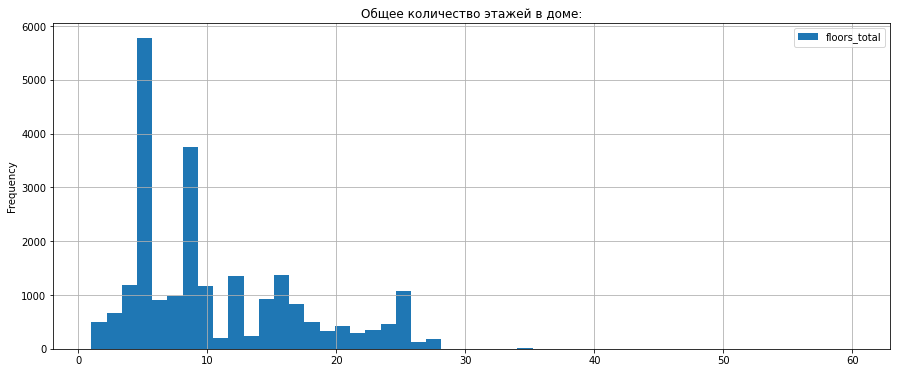

Согласно данным среднее значение 11.0, а медиана 9.0.


In [ ]:
data.plot(kind='hist', title='Общее количество этажей в доме:', y='floors_total', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение \
{data['floors_total'].mean().round(0)}, а медиана {data['floors_total'].median().round(0)}.")

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Если вдруг тебе понравилась тема визуаизации, рекомендую посмотреть на библиотеку `seaborn`. 
</div>

Расстояние до центра города в метрах:

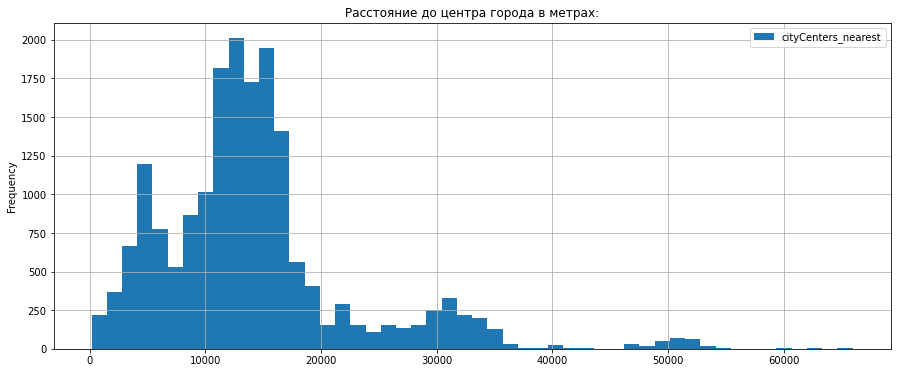

Согласно данным среднее значение 14198.0, а медиана 13105.0.


In [ ]:
data.plot(kind='hist', title='Расстояние до центра города в метрах:', \
          y='cityCenters_nearest', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение {data['cityCenters_nearest'].mean().round(0)}, \
а медиана {data['cityCenters_nearest'].median().round(1)}.")

Расстояние до ближайшего аэропорта:

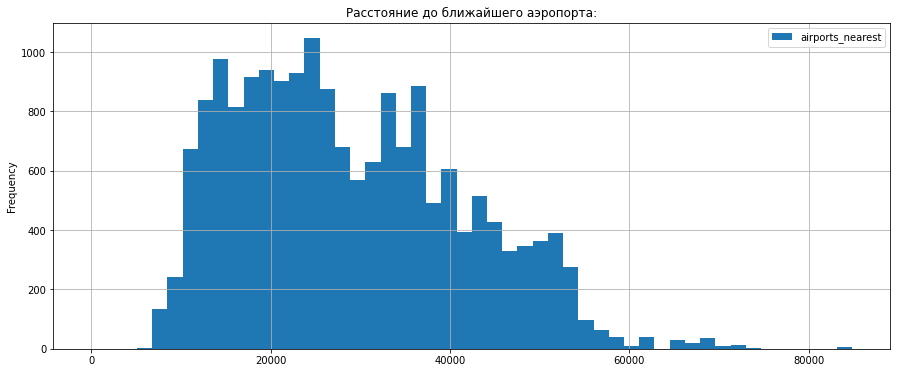

Согласно данным среднее значение 28803.0, а медиана 26756.0.


In [ ]:
data.plot(kind='hist', title='Расстояние до ближайшего аэропорта:', y='airports_nearest', \
          bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение {data['airports_nearest'].mean().round(0)}, \
а медиана {data['airports_nearest'].median().round(0)}.")

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Как аналог для построения графиков можно было бы использовать цикл `for`, чтобы автоматизировать код внутри проекта.
    
</div>

Расстояние до ближайшего парка:

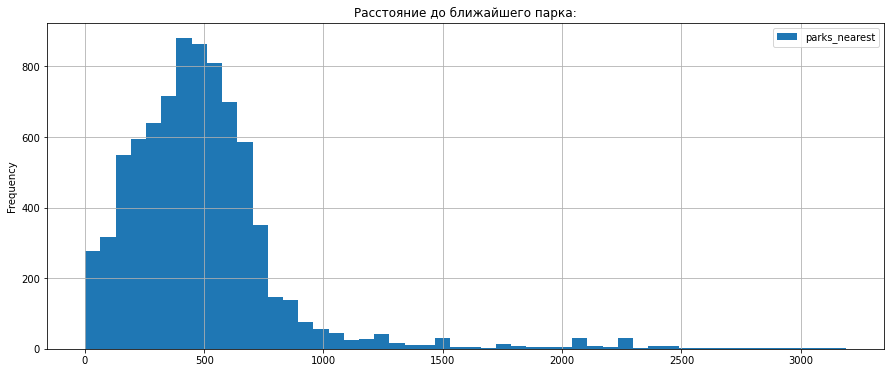

Согласно данным среднее значение 491.0, а медиана 454.0.


In [ ]:
data.plot(kind='hist', title='Расстояние до ближайшего парка:', y='parks_nearest', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение {data['parks_nearest'].mean().round(0)}, а медиана {data['parks_nearest'].median().round(0)}.")

День и месяц публикации объявления:

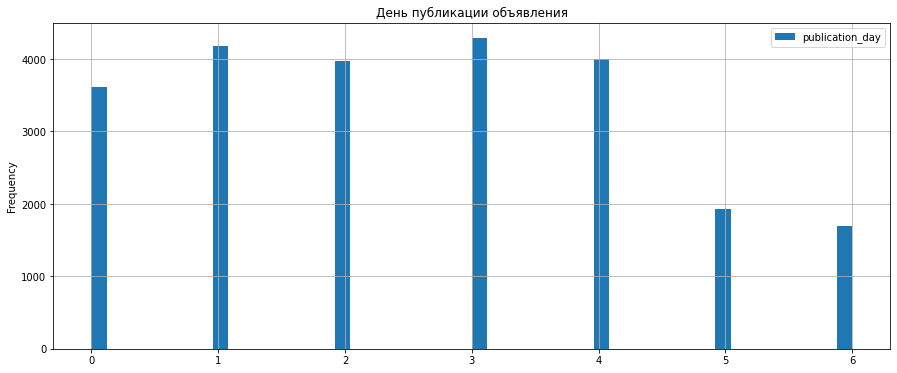

Согласно данным среднее значение 3.0, что говорит о том что чаще всего объявления публикуют в четверг


In [ ]:
data.plot(kind='hist', title='День публикации объявления', y='publication_day', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение {data['publication_day'].mean().round(0)}, \
что говорит о том что чаще всего объявления публикуют в четверг")

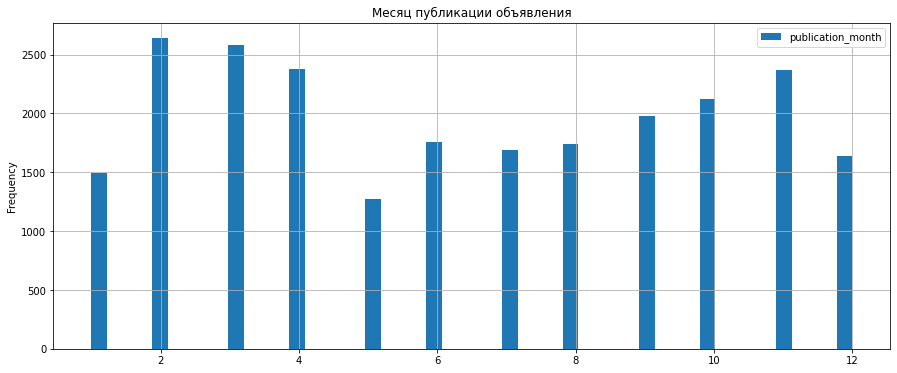

Согласно данным среднее значение 6.0, что говорит о том что чаще всего объявления публикуют в июне


In [ ]:
data.plot(kind='hist', title='Месяц публикации объявления', y='publication_month', bins=50, grid=True, figsize=(15,6))
plt.show()
print(f"Согласно данным среднее значение {data['publication_month'].mean().round(0)}, \
что говорит о том что чаще всего объявления публикуют в июне")

####  Как быстро продавались квартиры:

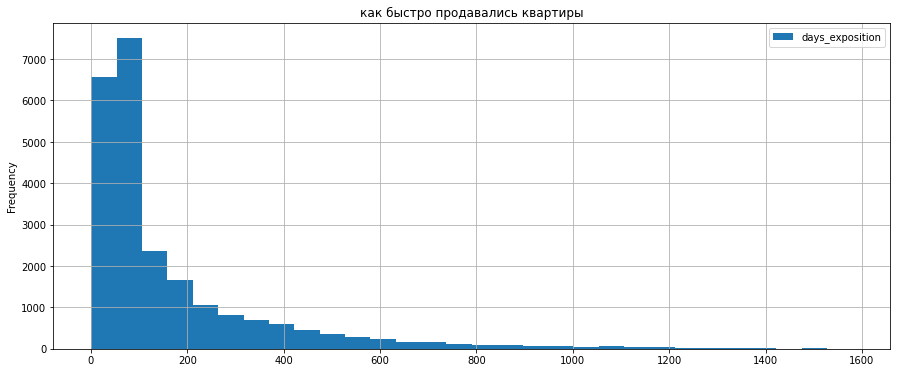

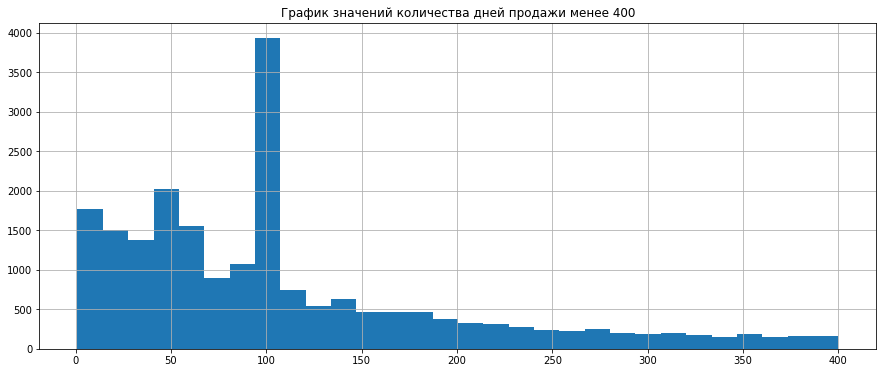

Согласно данным, большинство квартир продается со сроком размщения до 169 дней
Среднее кол_во дней: 169, медиана: 95.


In [ ]:
data.plot(kind='hist', title='как быстро продавались квартиры', y='days_exposition',bins=30, grid=True, figsize=(15,6))
plt.show()
plt.title('График значений количества дней продажи менее 400')
data.query('days_exposition <= 400')['days_exposition'].hist(bins=30,figsize=(15,6))
plt.show()
print(f"Согласно данным, большинство квартир продается со сроком размщения до 169 дней")
print(f"Среднее кол_во дней: {data['days_exposition'].mean().astype('int')}, \
медиана: {data['days_exposition'].median().astype('int')}.")

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Чтобы нам в ручную не задавать параметр `range` или не использовать фильтрацию датасета, мы можем посмотреть в открытом доступе  – как считать интерквартильный размах для нижнего и верхнего уровня нормального распределения.
    
https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr
    
</div>

Вывод: квартиры которые продаются быстрее чем за 95 дней можно считать быстрыми так это медианое значение и оно более точно отображает действительные значения, а необычно долгими у которых срок размещения более 169 дней, т.к. большинство квартив продается раньше.

#### Факторы, больше всего влияющие на общую (полную) стоимость объекта.

Лучшем показателем фактора вляиния будет кореляция.

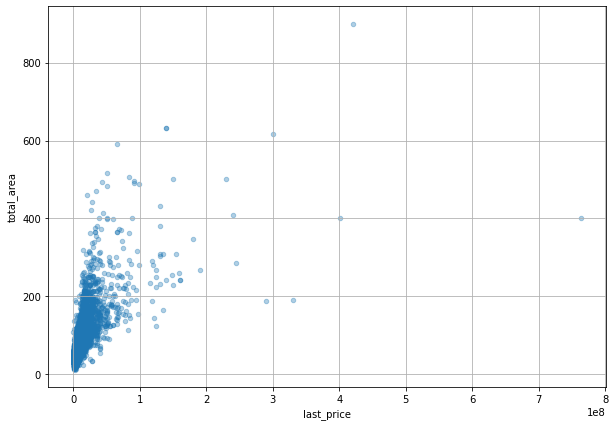

0.65


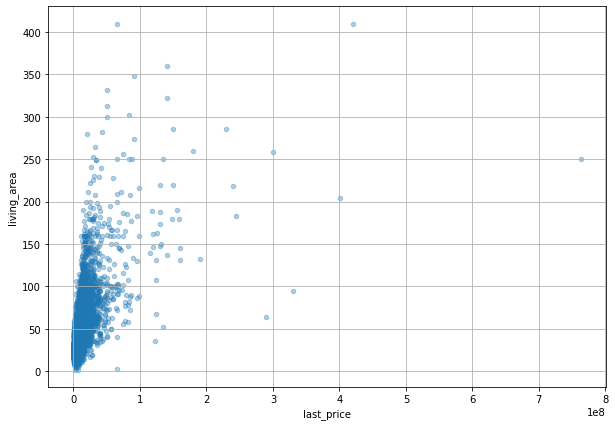

0.59


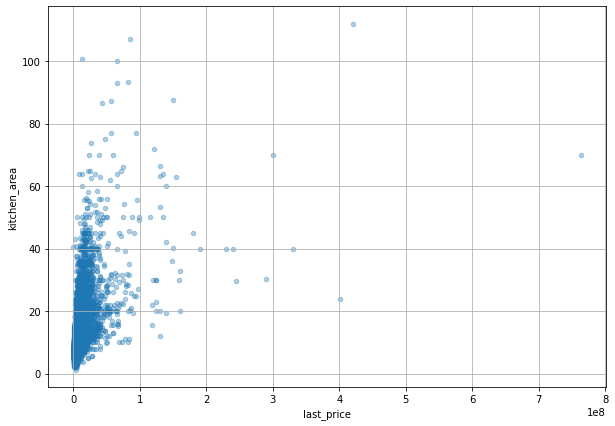

0.51


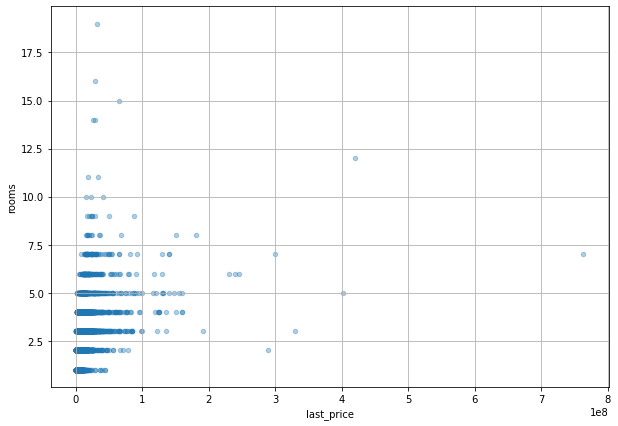

0.36


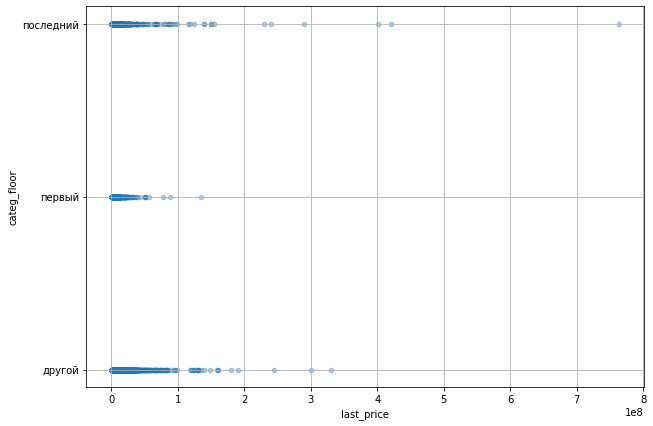

Для данного типа данных невозможно посчитать кореляцию


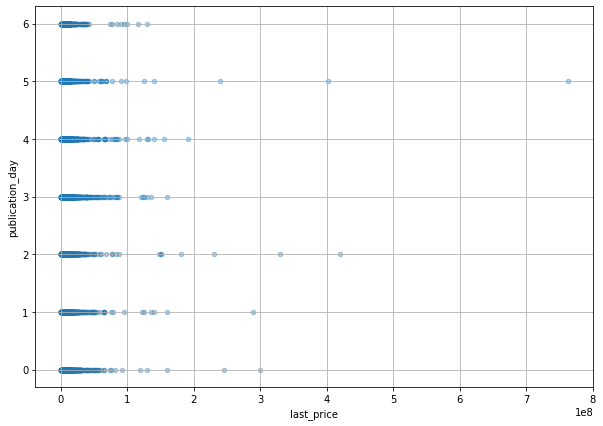

0.0


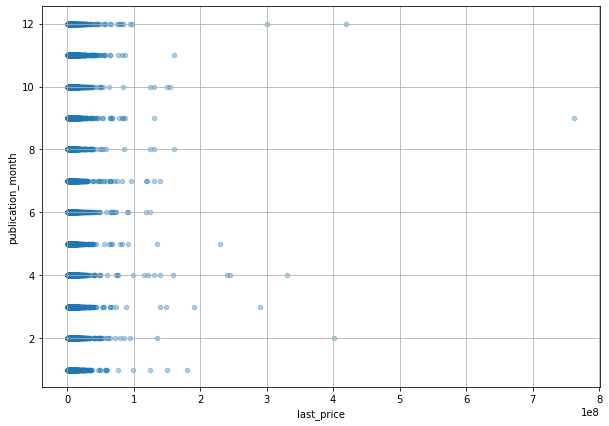

0.0


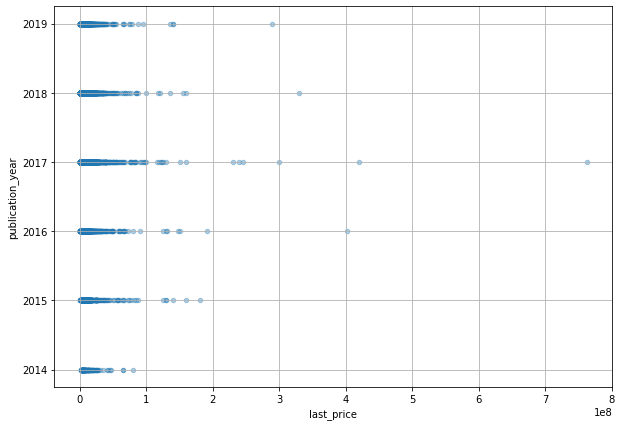

-0.04


In [ ]:
fact_list = ['total_area',        #общаяя площадь
                  'living_area',  #жилая площадь
                  'kitchen_area', #площадь кухни
                  'rooms',        #количество комнат
                  'categ_floor', #этаж, на котором расположена квартира (первый, последний, другой)
                  'publication_day',    #день недели
                  'publication_month',  #месяц
                  'publication_year']   #год

for i in fact_list:
    data.plot(x='last_price', y=i,grid=True, kind='scatter', alpha=0.35,figsize=(10,7)) 
    plt.show()
    try:
        print(data['last_price'].corr(data[i]).round(2))
    except:
        print('Для данного типа данных невозможно посчитать кореляцию')

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, что получилось применить автоматизацию построения графиков 👍
    
Теперь в нужный момент мы сможем применить данный инструмент.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7))`, который также поможет настроить ширину и высоту графика.
    
</div>

<p>
    
По графикам можно сделать вывод что:
- `'total_area'` — с показателем кореляции 0,65 больше чем остальные факторы влияет на стоимость. 
- `'living_area'` — с показателем кореляции 0.59, показатель тоже вляиет на стоимость, но не так как общая площадь.
- `'kitchen_area'` — с показателем кореляции 0.51 меньше влияет на стоимость.
- `'rooms'` — с показателем кореляции 0.36, не так сильно вляиет на стоимость. Большинство предложений это 1, 2, и 3 -комнатные квартиры.     
- `'categ_floor'` — не влияет, большиство предложений не "крайние" этажи.
- `'publication_day'` — не влияет на стоиомость.
- `'publication_month'` — не влияет на стоиомость.
- `'publication_year'` — не влияет на стоиомость.


#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

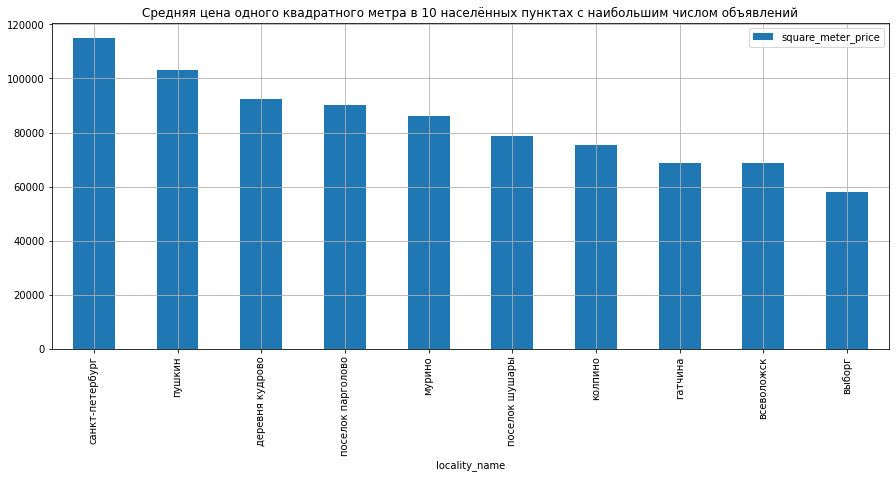

In [ ]:
ten_city = data['locality_name'].value_counts().head(10)
ten_city_tabl = data.query('locality_name in (@ten_city.index)').pivot_table(values='square_meter_price', index='locality_name')
ten_city_tabl = ten_city_tabl.astype(int).sort_values('square_meter_price', ascending=False)
# идею взял на:
#https://stackoverflow.com/questions/46457615/python-matplotlib-style-file-show-only-horizontal-gridlines?noredirect=1
plt.style.use('https://gist.githubusercontent.com/luisdelatorre012/b36899e6dca07d05e73aca80eceb3098/raw/43ae73605b5e33dfc3f0d7e5d423ff997fc8325c/tiny.mplstyle')
fig, ax = plt.subplots()
ten_city_tabl.plot(kind='bar',y = 'square_meter_price', ax=ax,figsize=(15,6), )
plt.title('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.show()

Самая высокая стоимость квадратного метра ожидаемо в областном центре - Санкт-Петербурге, самая низкая - в Выборге. Согласно яндекс картам расстояние от Санкт-петербурга до Выборга - 144 км, что гораздо больше чем у всех остальных населенных пунктов.

<div class="alert alert-info"> <b>
Исправил

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>


<s>Можно было также визуализировать эту информацию. Ведь на графике информацию воспринимать гораздо легче, чем просто в таблице.
    
    
</div>

#### Удаленность от центра

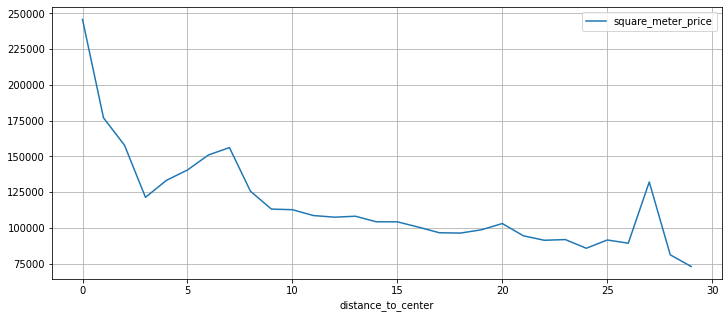

In [ ]:
(
    data.query('locality_name == "санкт-петербург"')
    .pivot_table(index='distance_to_center', values='square_meter_price', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
)

График довольно наглядно показывает взаимосвязь: чем дальше от центра города, тем  меньше цена 1 м2.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Согласен, здорово что подтвердили эту информацию на основе данных 👍    
</div>

### Общий вывод

1. Первым делом изучил предоставленный дадасет и изучил информацию, предоставленную в нем.
2. Проверил данные на явные дуликаты - их не было.
3. Обнаружил определенное количество пропущенных значений. Вероятные причины пропусков:
- не указано количество балконов, что предположительно говорит о том, что для значения `0` был пропуск.
- заменил пропущенные значения в `'floors_total'`. Вероятно для одноэтажных зданий значение вовсе не указали.
- в столбце `'is_apartment'` вероятнее всего пропуск означает булево значение False, заменил.
- пропуски `'days_exposition'` заменил медианой, т.к. медиана отражает наиболее достоверную информацию о данных.
- пропуски в `'kitchen_area'` и `'living_area'` заменил через расчет коэффициента(среднеее отношение данных типов площадей к общему).
 Возможные причины пропусков: неправильный запрос к БД, некорректная выгрузка и т.п., не стоит исключать и человеческого фактора: кто-то что-то не ввел, умышленно или нет.

4. Проверил типы данных и привел к необходимым значениям, в частности - привел к целочисленным значениям такие столбцы:
- количество комнат.
- количество балконов.
- номер этажа.
- количество этажей в доме.
- количество дней публикации.
Привел к типу `datetime` колонку  `first_day_exposition`.
5. Изучил уникальные значения в столбце с названиями населенных пунктов, для устранения неявных дубликатов использовал следущие метода:
- преведение значений к нижнему регистру.
- замена ё на е.
- привел похожий тип населенных пунктов к одному виду - поселок.
6. Заменил значения в столбце - высота потолков. Встречающиеся значения от 25 до 32 метров - явная ошибка пропуска знака десятичной дроби.
7. Ввел в таблицу дополнительные столбцы. (общая площадь, день недели публикации объявления, месяц публикации объявления, год, публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.
8. Провел исследовательский анализ влияния на стоимость квартиры нескольких параметров.
9. Пришел к выводу, что на стоимость квартиры наиболее влияют следующие факторы:
- `Общая площадь` — с показателем кореляции 0,65 больше чем остальные факторы влияет на стоимость.
- `Жилая площадь` — с показателем кореляции 0.59, показатель тоже вляиет на стоимость, но не так как общая площадь.
- `Площадь кухни` — с показателем кореляции 0.51 меньше влияет на стоимость.
- `Количество комнат` — с показателем кореляции 0.36, не так сильно вляиет на стоимость. Большинство предложений это 1, 2, и 3 -комнатные квартиры.
10. Проверил среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Вывод: самые большие цены на квартиры в Санкт-Петербурге. Самая низкая цена в Выборге - самый удаленный город из представленных.
11. Проверил как удаленность от центра Санкт-Петербурга влияет на стоимость. Чем дальше от центра города, тем меньше цена 1 м2.
12. На основании проведенного анализа можно сделать общий вывод: на стоимость квартиры в первую очередь влияет общая площадь и  удаленность от центра Санкт-Петербурга, а также удаленность ближайших начеленных пунктов.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
    
    
**[общий комментарий]** Ячейки **markdown** в том числе мы можем использовать как дополнительный способ стилизации нашего проекта. Оставил ниже ссылку, с примерами стилизации.

https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Рад, что в целом все понятно и особенно круто, что сразу стараешься применить новые знания на практике, ведь так они гораздо быстрее усвоятся. Тогда предлагаю двигаться дальше.
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод